# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Data Set

In [5]:
db = pd.read_csv("Diwali Sales Data.csv",encoding='windows-1252')

# Data Cleaning

In [6]:
db.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
db.shape

(11251, 15)

In [8]:
db.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [9]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [10]:
db.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [11]:
db=db.fillna(value=db["Amount"].mean())

In [12]:
db["Marital_Status"]=db["Marital_Status"].astype("object")

In [13]:
db=db.replace(0,"no")
db=db.replace(1,"Yes")
db["Marital_Status"].head(5)

0     no
1    Yes
2    Yes
3     no
4    Yes
Name: Marital_Status, dtype: object

# Visualization Of Cleaned Data

In [14]:
a = db["Product_Category"].value_counts().index[:5]
b= db ["Product_Category"]. value_counts().values[:5]
a
b

array([2655, 2493, 2087, 1064,  520], dtype=int64)

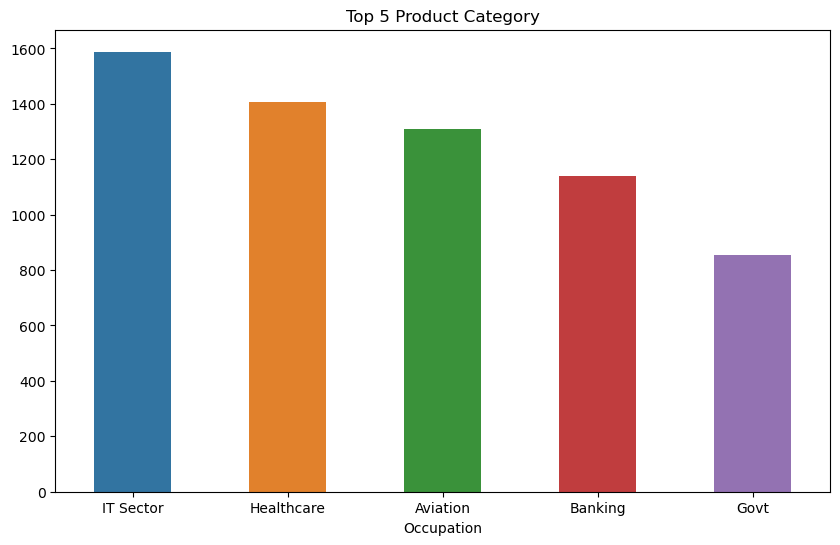

In [39]:
plt.figure(figsize=(10,6))
plt.title("Top 5 Product Category")
sns.barplot(y=b,x=a , data = db, estimator=sum,width=0.5)
plt.show()

This chart tell us about which Top 5 products category was sold 

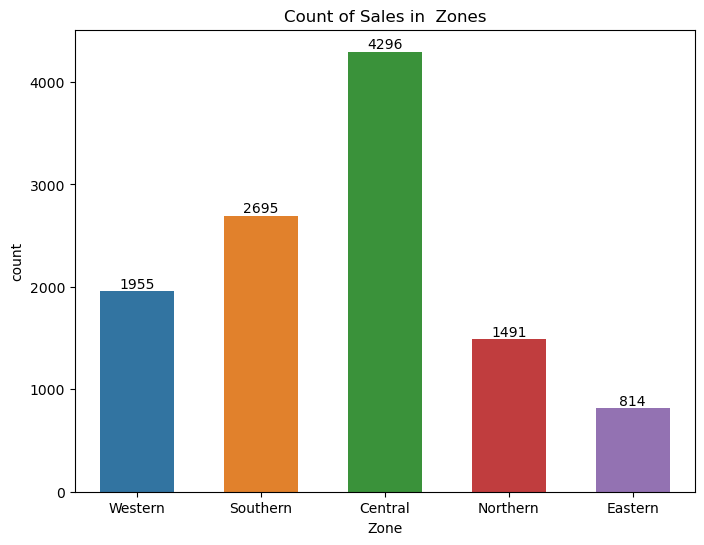

In [90]:
plt.figure(figsize=(8,6))
plt.title("Count of Sales in  Zones",)
ax=sns.countplot(x="Zone", data = db,width=0.6)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

This chart tell us which zone has most sales 

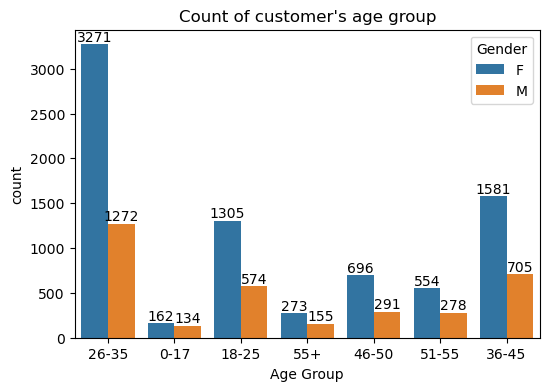

In [43]:
plt.figure(figsize=(6,4))
plt.title("Count of customer's age group")
ax=sns.countplot(x="Age Group",data=db,hue="Gender")
for bars in ax.containers:
   ax.bar_label(bars) 
plt.show()

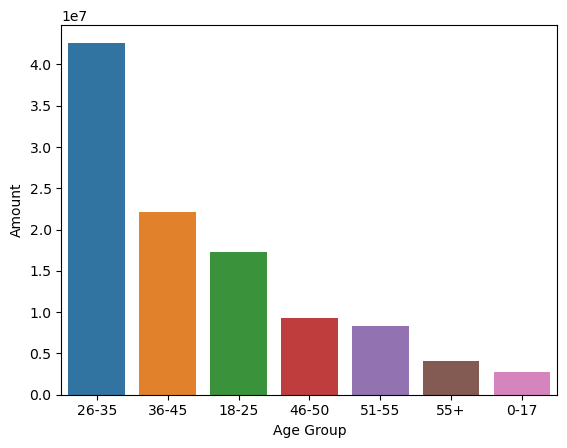

In [79]:
gb=db.groupby(["Age Group"] ,as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)
sns.barplot(x="Age Group",y="Amount",data=gb)
plt.show()

With this chart we can conclueded that people between age of 26-35 spent most money in shopping

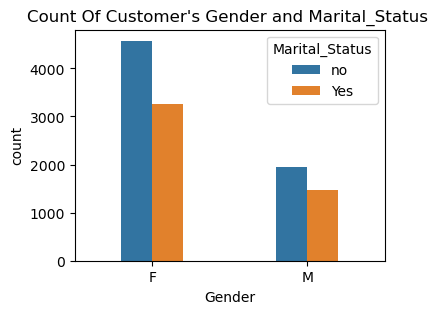

In [33]:
plt.figure(figsize=(4,3))
plt.title("Count Of Customer's Gender and Marital_Status ")
sns.countplot(x="Gender" ,data = db,hue="Marital_Status",width=0.4)

plt.show()

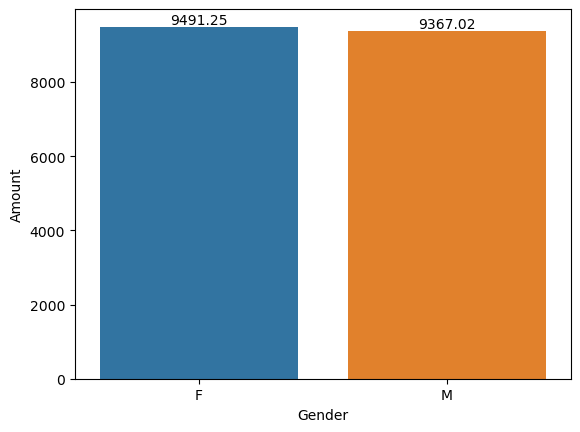

In [99]:
gb= db.groupby(["Gender"] , as_index=False)["Amount"].mean().sort_values(by="Amount",ascending=False)
ax=sns.barplot(x="Gender",y="Amount",data=gb)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

This chart us average amount of shopping done by female and male customers

In [21]:
a = db["Occupation"].value_counts().index[:5]
b=db["Occupation"].value_counts().values[:5]

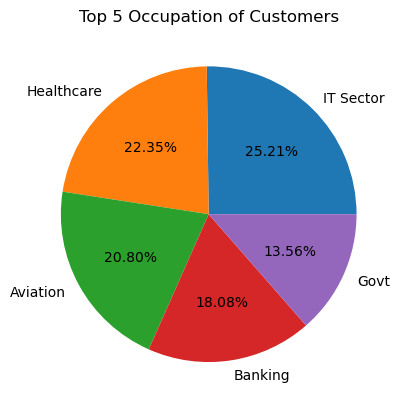

In [22]:
plt.title("Top 5 Occupation of Customers")
plt.pie(b,labels=a, data=db,autopct="%0.2f%%")
plt.show()